# Data stats and augmentations

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..', 'common'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)

In [3]:
from data_utils import TRAIN_CSV_FILEPATH, TRAIN_CSV, TRAIN_ENC_CSV, get_caption, train_jpg_ids
from image_utils import get_image_data

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
TRAIN_ENC_CSV.head()

,image_name,tags,cloudy,slash_burn,cultivation,blow_down,artisinal_mine,agriculture,haze,conventional_mine,blooming,partly_cloudy,road,primary,bare_ground,habitation,selective_logging,clear,water
0,train_0,haze primary,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,train_1,agriculture clear primary water,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
2,train_2,clear primary,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,train_3,clear primary,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,train_4,agriculture clear habitation primary road,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0


In [74]:
img = get_image_data("0", "Train_jpg")
img.min(), img.max(), img.dtype

(75, 126, dtype('uint8'))

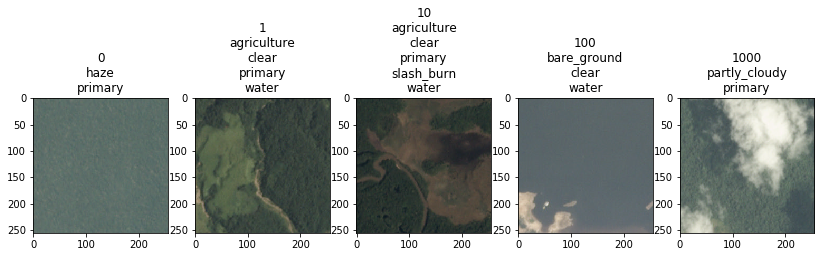

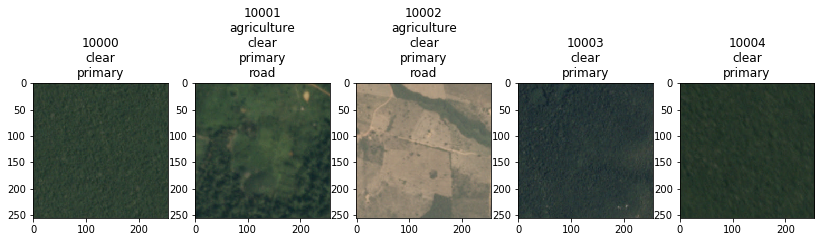

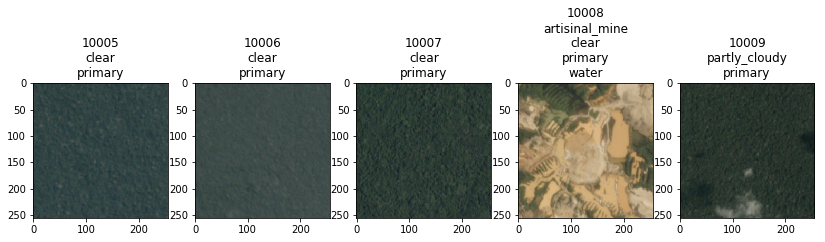

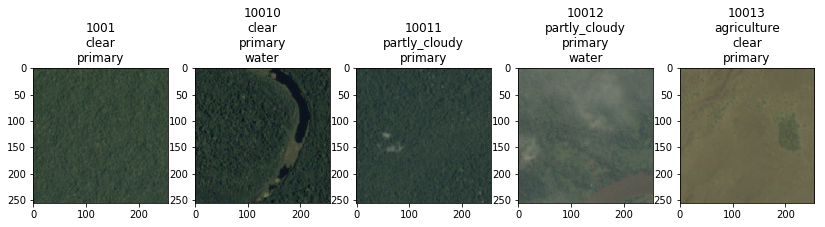

In [7]:
n = 5
counter = 0
for image_id in train_jpg_ids[:20]:
    img = get_image_data(image_id, "Train_jpg")
    caption = get_caption(image_id, "Train_jpg")
    if counter % n == 0:
        plt.figure(figsize=(14, 5))
    plt.subplot(1, n, counter % n + 1)
    plt.imshow(img[:,:,:3])
    plt.title(image_id + "\n" + caption.replace(' ', '\n'))
    counter += 1

## Data stats

In [8]:
from data_utils import unique_tags

In [9]:
def compute_stats(tags=None, train_enc_csv=TRAIN_ENC_CSV):
    if tags is None:
        tags = unique_tags
    tags_stats = {}
    for l in tags:
        tags_stats[l] = train_enc_csv[l].sum()
    return tags_stats

In [10]:
all_tags_stats = compute_stats()
all_tags_stats

{'agriculture': 12315,
 'artisinal_mine': 339,
 'bare_ground': 862,
 'blooming': 332,
 'blow_down': 98,
 'clear': 28431,
 'cloudy': 2089,
 'conventional_mine': 100,
 'cultivation': 4477,
 'habitation': 3660,
 'haze': 2697,
 'partly_cloudy': 7261,
 'primary': 37513,
 'road': 8071,
 'selective_logging': 340,
 'slash_burn': 209,
 'water': 7411}

<Container object of 17 artists>

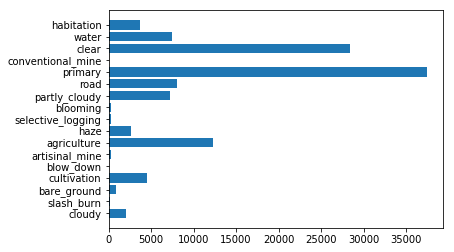

In [11]:
plt.barh(bottom=range(len(all_tags_stats.keys())), width=all_tags_stats.values(), tick_label=all_tags_stats.keys())

### Separate data to equalize stats

In [12]:
all_tags_stats

{'agriculture': 12315,
 'artisinal_mine': 339,
 'bare_ground': 862,
 'blooming': 332,
 'blow_down': 98,
 'clear': 28431,
 'cloudy': 2089,
 'conventional_mine': 100,
 'cultivation': 4477,
 'habitation': 3660,
 'haze': 2697,
 'partly_cloudy': 7261,
 'primary': 37513,
 'road': 8071,
 'selective_logging': 340,
 'slash_burn': 209,
 'water': 7411}

In [13]:
from data_utils import equalized_data_classes as data_classes

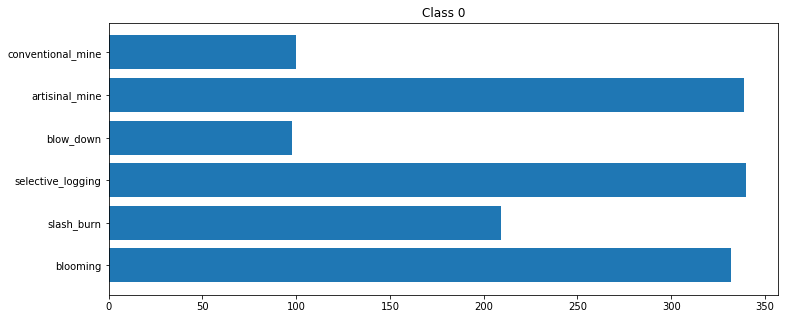

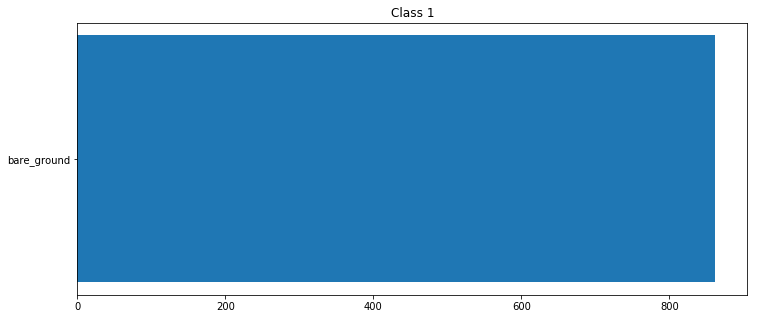

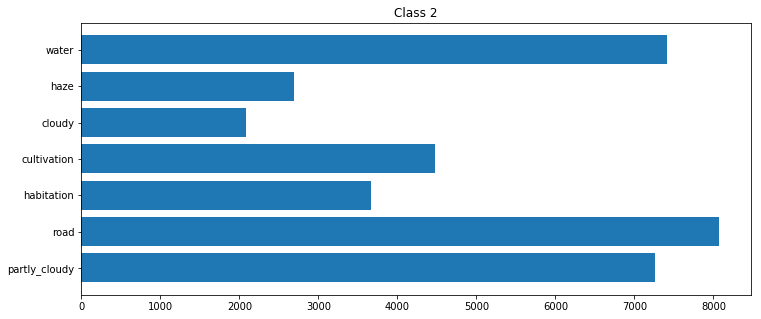

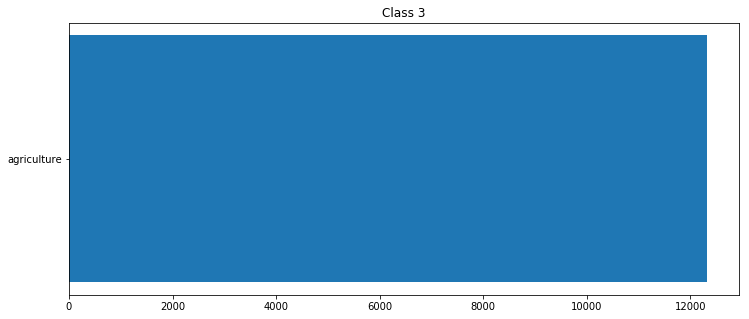

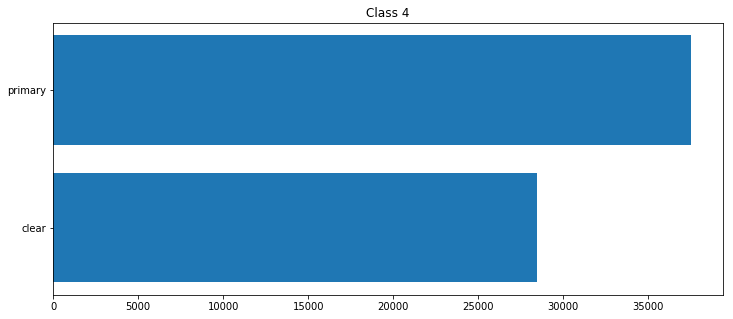

In [14]:
for class_index in data_classes:    
    tags = data_classes[class_index]
    tags_stats = compute_stats(tags)
    plt.figure(figsize=(12, 5))
    plt.title("Class %i" % class_index)
    plt.barh(bottom=range(len(tags_stats.keys())), width=tags_stats.values(), tick_label=list(tags_stats.keys()))

## Data augmentation

In [34]:
import cv2
from image_utils import scale_percentile

from keras import backend as K
from training_utils import get_gen_flow, get_train_imgaug_seq
from data_utils import TRAIN_ENC_CL_CSV, get_id_type_list, equalized_data_classes

In [30]:
TRAIN_ENC_CL_CSV.head()

,image_name,tags,cloudy,slash_burn,cultivation,blow_down,artisinal_mine,agriculture,haze,conventional_mine,...,habitation,selective_logging,clear,water,class_0,class_1,class_2,class_3,class_4,image_id
0,train_0,haze primary,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,train_1,agriculture clear primary water,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,1,1,1
2,train_2,clear primary,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2
3,train_3,clear primary,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,3
4,train_4,agriculture clear habitation primary road,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,1,1,4


In [35]:
equalized_data_classes

{0: ['selective_logging',
  'slash_burn',
  'blow_down',
  'blooming',
  'conventional_mine',
  'artisinal_mine'],
 1: ['bare_ground'],
 2: ['haze',
  'water',
  'partly_cloudy',
  'cultivation',
  'road',
  'habitation',
  'cloudy'],
 3: ['agriculture'],
 4: ['primary', 'clear']}

In [17]:
df = TRAIN_ENC_CL_CSV[TRAIN_ENC_CL_CSV['class_0'] == 1]

class_0_stats = compute_stats(train_enc_csv=df)
class_0_stats

{'agriculture': 292,
 'artisinal_mine': 339,
 'bare_ground': 75,
 'blooming': 332,
 'blow_down': 98,
 'clear': 1232,
 'cloudy': 0,
 'conventional_mine': 100,
 'cultivation': 241,
 'habitation': 122,
 'haze': 19,
 'partly_cloudy': 142,
 'primary': 1372,
 'road': 362,
 'selective_logging': 340,
 'slash_burn': 209,
 'water': 406}

<Container object of 17 artists>

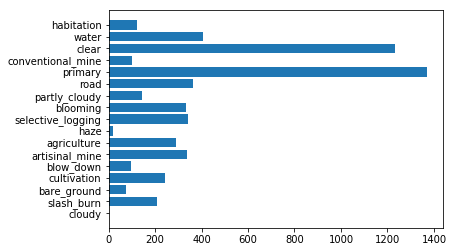

In [31]:
plt.barh(bottom=range(len(class_0_stats.keys())), width=class_0_stats.values(), tick_label=class_0_stats.keys())

In [32]:
id_type_list = get_id_type_list(0)

In [33]:
id_type_list[:10]

[(10, 'Train_jpg'),
 (24, 'Train_jpg'),
 (57, 'Train_jpg'),
 (70, 'Train_jpg'),
 (82, 'Train_jpg'),
 (144, 'Train_jpg'),
 (151, 'Train_jpg'),
 (166, 'Train_jpg'),
 (185, 'Train_jpg'),
 (187, 'Train_jpg')]

### Display images with data_iterator

In [24]:
train_id_type_list = id_type_list

In [26]:
n_limit = 10

params = {
    'seed': 2017,
    'normalize_data': True,
    'normalization': 'vgg',
    'image_size': (256, 256),
    'batch_size': 5,
    'save_prefix': 'check_data_iterators'
}
channels_first = K.image_dim_ordering() == 'th'

In [27]:
imgaug_seq = get_train_imgaug_seq(seed=params['seed'])
train_gen, train_flow = get_gen_flow(id_type_list=train_id_type_list[:n_limit], imgaug_seq=imgaug_seq, **params)

Image normalization:  vgg


(5, 256, 256, 3) (5, 17)
-39.2715 47.7091
(5, 256, 256, 3) (5, 17)
-48.8267 28.7777
(5, 256, 256, 3) (5, 17)
-51.744 37.3638
(5, 256, 256, 3) (5, 17)
-37.1002 41.9326
(5, 256, 256, 3) (5, 17)
-45.6021 28.7138


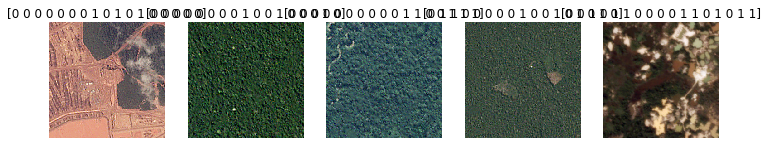

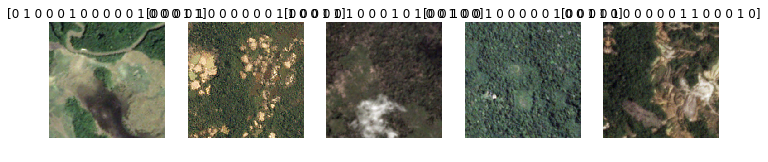

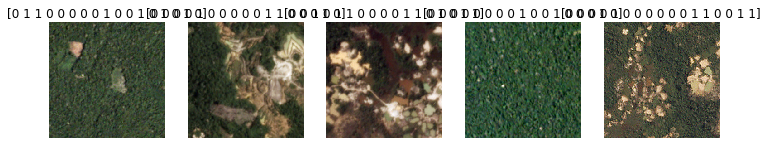

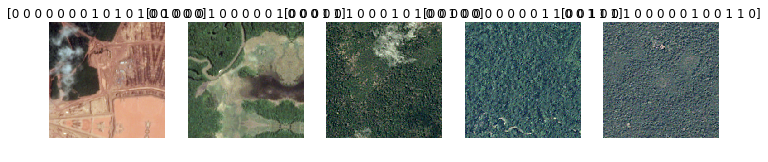

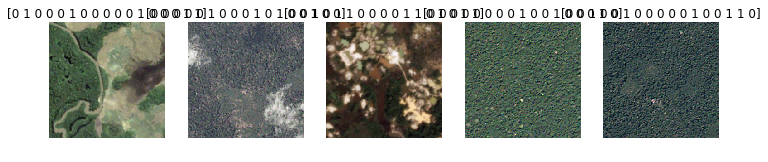

In [28]:
loop_max_counter = 5
for x, y in train_flow:
    
    print(x.shape, y.shape)
    print(x.mean(), x.std())
    n = 5
    for counter in range(params['batch_size']):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        if channels_first:
            img = x[counter, :, :, :].transpose([1, 2, 0])
        else:
            img = x[counter, :, :, :]
        plt.imshow(scale_percentile(img, q_min=0.0, q_max=100.0))
#         plt.imshow(img)
        plt.title("{}".format(y[counter]))    
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

## White pixels

In [38]:
from data_utils import get_id_type_list_from_df

In [42]:
cloudy_mask = TRAIN_ENC_CL_CSV['cloudy'] == 1
partly_cloudy_mask = TRAIN_ENC_CL_CSV['partly_cloudy'] == 1
df = TRAIN_ENC_CL_CSV[cloudy_mask | partly_cloudy_mask]

In [44]:
df[['image_id', 'cloudy', 'partly_cloudy']].tail()

,image_id,cloudy,partly_cloudy
40455,40455,0,1
40461,40461,1,0
40464,40464,0,1
40475,40475,1,0
40478,40478,0,1


In [45]:
id_type_list = get_id_type_list_from_df(df)

In [46]:
len(id_type_list)

9350

In [51]:
train_id_type_list = id_type_list

In [75]:
n_limit = -1

params = {
    'seed': 2017,
    'normalize_data': False,
    'normalization': '',
    'image_size': (256, 256),
    'batch_size': 5,
    'save_prefix': 'check_data_iterators'
}
channels_first = K.image_dim_ordering() == 'th'

In [76]:
from training_utils import get_id_imgaug_seq

In [77]:
import numpy as np
import cv2

def to_hsl(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

In [93]:
imgaug_seq = get_id_imgaug_seq()
train_gen, train_flow = get_gen_flow(id_type_list=train_id_type_list[:n_limit], imgaug_seq=imgaug_seq, **params)

-- (5, 256, 256, 3) (5, 17)
-- 0.0901961 0.905882 0.483697 0.180606
-- (5, 256, 256, 3) (5, 17)
-- 0.0862745 0.870588 0.390886 0.127664
-- (5, 256, 256, 3) (5, 17)
-- 0.141176 0.980392 0.471123 0.137622
-- (5, 256, 256, 3) (5, 17)
-- 0.129412 0.905882 0.525571 0.195301
-- (5, 256, 256, 3) (5, 17)
-- 0.0117647 0.909804 0.366732 0.169534


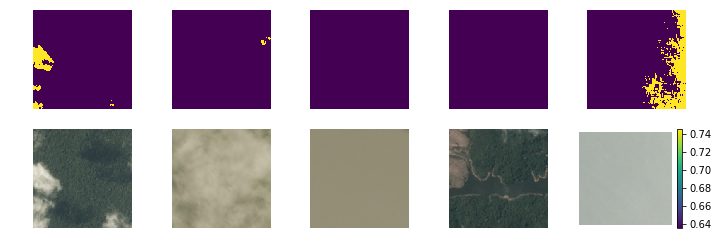

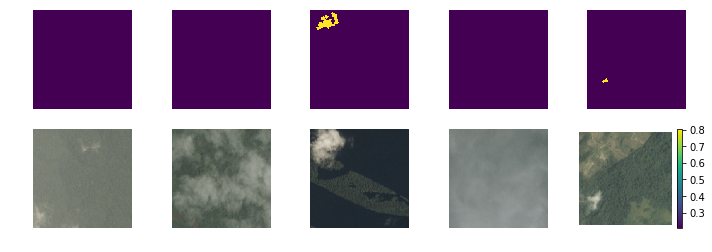

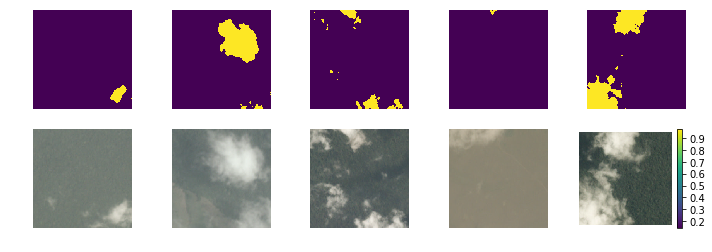

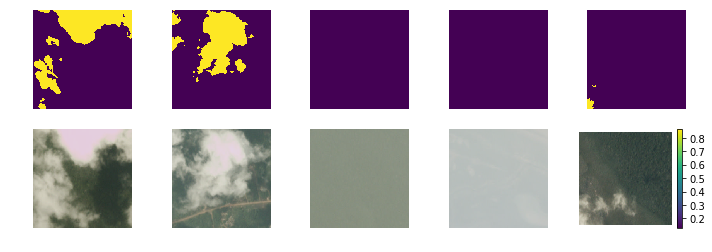

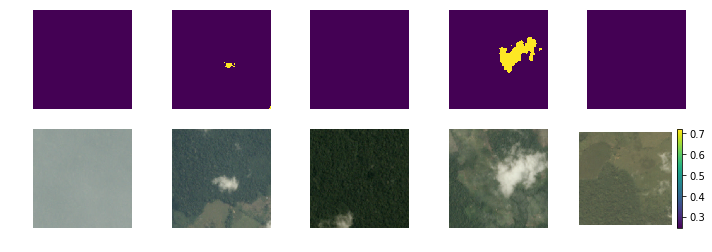

In [107]:
loop_max_counter = 5
for x, y in train_flow:
    
    print('--', x.shape, y.shape)
    print('--', x.min(), x.max(), x.mean(), x.std())
        
    n = 5
    for counter in range(params['batch_size']):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))

        if channels_first:
            img = x[counter, :, :, :].transpose([1, 2, 0])
        else:
            img = x[counter, :, :, :]
        
#         img2 = scale_percentile(img, q_min=0.0, q_max=100.0)
        img2 = (255.0 * img).astype(np.uint8)
        hls = to_hsl(img2)
        
        l = hls[:, :, 1]
#         print(l.min(), l.mean(), l.max()) 
        l[l > 180] = 255
        l[l <= 180] = 0
        img2 = l 

        plt.subplot(2, n, counter % n + 1)
#         plt.imshow(scale_percentile(img2, q_min=0.0, q_max=100.0))
        plt.imshow(img2)
#         plt.title("{}".format(y[counter]))    
        plt.axis('off')
        
        plt.subplot(2, n, counter % n + n + 1)    
        plt.imshow(img)
        plt.axis('off')
    
    plt.colorbar()
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

In [1]:
import numpy as np

In [3]:
a = np.zeros((32, 17))
a[1] = 1.0
b = 0.5 * np.ones((32, 17))

In [6]:
np.mean(np.abs(a - b))

0.5